In [35]:
import numpy as np
import matplotlib.pyplot as plt
import kcorrect 
import math
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
import itertools
%matplotlib inline
import scipy.stats as stats

import plotting_tools as pt

# this notebook is looking at how the final selection compares to the MGS in each band pass
# 0 sdss.modelMag_u, 
# 1 sdss.modelMag_r, 
# 2 sdss.petroMag_r, 
# 3 spec.z, 
# 4 sdss.petroR50_r, 
# 5 galex.fuv_mag, 
# 6 galex.nuv_mag, 
# 7 sdss.modelMag_u, 
# 8 sdss.modelMag_g,
# 9 sdss.modelMag_r,
# 10 sdss.modelMag_i,
# 11 sdss.modelMag_z
# 12 ukidss.yPetroMag, 
# 13 ukidss.j_1PetroMag,
# 14 ukidss.hPetroMag,
# 15 ukidss.kPetroMag,
# 16 wise.w1mpro ,  
# 17 wise.w2mpro , 
# 18 wise.w3mpro , 
# 19 wise.w4mpro , 
# 20 galex.fuv_magerr,
# 21 galex.nuv_magerr,
# 22 sdss.modelMagErr_u ,
# 23 sdss.modelMagErr_g , 
# 24 sdss.modelMagErr_r,
# 25 sdss.modelMagErr_i, 
# 26 sdss.modelMagErr_z,
# 27 ukidss.yPetroMagErr, 
# 28 ukidss.j_1PetroMagErr, 
# 29 ukidss.hPetroMagErr, 
# 30 ukidss.kPetroMagErr, 
# 31 wise.w1sigmpro, 
# 32 wise.w2sigmpro, 
# 33 wise.w3sigmpro, 
# 34 wise.w4sigmpro

In [73]:
# load sample
galaxies = np.load('/home/calum/Documents/Mphys_data/mgs_multiwavelength/abs_mwsample.npy')
galaxies.shape

(19082, 14)

In [74]:
# make photometric corrections

In [75]:
# begin creating colour-magnitude diagrams
# the different colours
names = ['FUV','NUV','u','g','r','i','z','Y','J','H','K','W1','W2']
indices = [i for i in range(1,14)]   
colour_combos = [i for i in itertools.combinations(indices,2)]
len(colour_combos), len(names), len(indices)

(78, 13, 13)

In [83]:
#for i,colrow in enumerate(colour_combos):
#    print(i,names[colrow[0]-1]+'-'+names[colrow[1]-1])

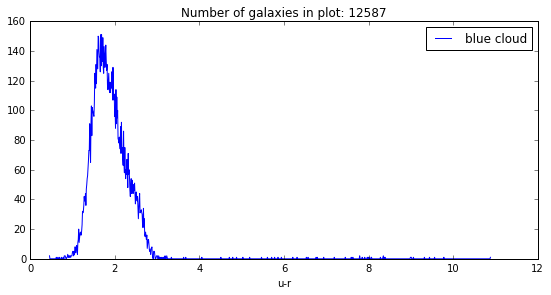

In [86]:
# histograms
plt.figure(figsize=(20,40))
for i,colrow in enumerate(colour_combos[24:25]):
    y = [row[colrow[0]]-row[colrow[1]] for row in [row for row in galaxies if 0.08>row[0]>0.004]]  
    plt.subplot(8,2,i+1)
    pt.plot_hist(y,200,'blue cloud',set_bin_size=True, bin_size=0.01,normed=False)
    plt.title('Number of galaxies in plot: '+str(len(y)))
    plt.legend()
    label = names[colrow[0]-1]+'-'+names[colrow[1]-1]
    plt.xlabel(label)

In [62]:
def kernel_density_estimation(x,y):
    xmin = np.min(x)
    xmax = np.max(x)
    ymin = np.min(y)
    ymax = np.max(y)
    # Peform the kernel density estimate
    xx, yy = np.mgrid[xmin:xmax:200j, ymin:ymax:200j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x, y])
    kernel = stats.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)
    return xx,yy,f

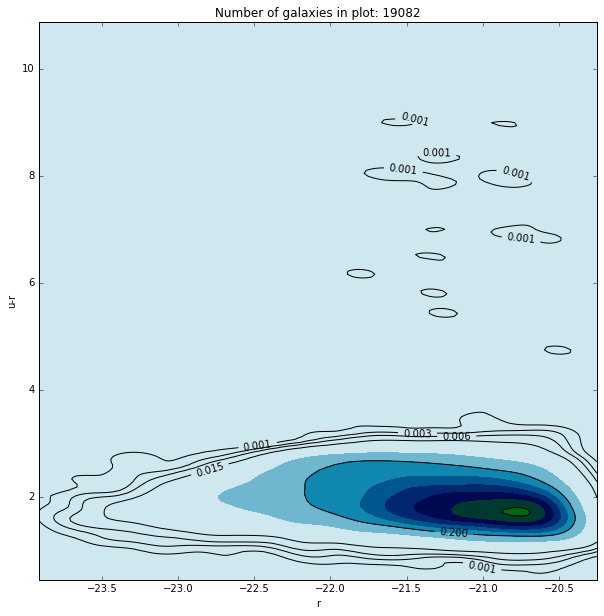

In [63]:
# histograms
#plt.figure(figsize=(20,80))
for i,colrow in enumerate(colour_combos[24:25]):
    x = [row[colrow[1]] for row in galaxies]
    y = [row[colrow[0]]-row[colrow[1]] for row  in galaxies]  
    xx,yy,f = kernel_density_estimation(x,y)
    #fig = plt.subplot(8,2,i+1)
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca()
    # Contourf plot
    cfset = ax.contourf(xx, yy, f, cmap='ocean_r',)
    ## Or kernel density estimate plot instead of the contourf plot
    #ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])
    cset = ax.contour(xx, yy, f,levels=[0.001,0.003,0.006,0.015,0.2,0.7], colors='k',alpha=1.)
    # Label plot
    ax.clabel(cset, inline=1, fontsize=10)
    label = names[colrow[0]-1]+'-'+names[colrow[1]-1]
    ax.set_ylabel(label)
    ax.set_xlabel(names[colrow[1]-1])
    ax.set_title('Number of galaxies in plot: '+str(len(y)))


In [5]:
# model fitting

In [17]:
plt.contour

[(5, 6), (5, 7), (5, 8), (5, 9)]

In [ ]:
xmin, xmax = -23,-16
ymin, ymax = 0.5,3.5

# Peform the kernel density estimate
xx, yy = np.mgrid[xmin:xmax:200j, ymin:ymax:200j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

fig = plt.figure(figsize=(20,10))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
# Contourf plot
cfset = ax.contourf(xx, yy, f,lines=20, cmap='pink_r',)
## Or kernel density estimate plot instead of the contourf plot
#ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f, colors='k',alpha=1.)
# Label plot
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('Y1')
ax.set_ylabel('Y0')


plt.xlim(-22,-18)
plt.ylim(1,3)

pl.show()